<font size = 8 color ='336EFF'>kNN</font>

Import Relevant Libraries

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Import Wine dataset

In [ ]:
# To import sklearn
from sklearn.datasets import load_wine
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = load_wine()
X = dataset.data[:,:10]; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train a kNN classifier

Set parameters weights='distance' and n_neighbors=4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

Predict the test dataset and print the confusion matrix

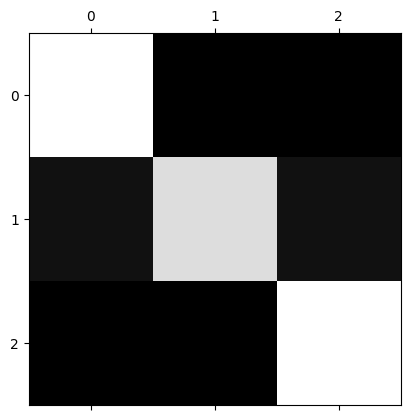

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn_clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.matshow(cm, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_plot")
plt.show()

## Using Accuracy to Get the Best Value of k

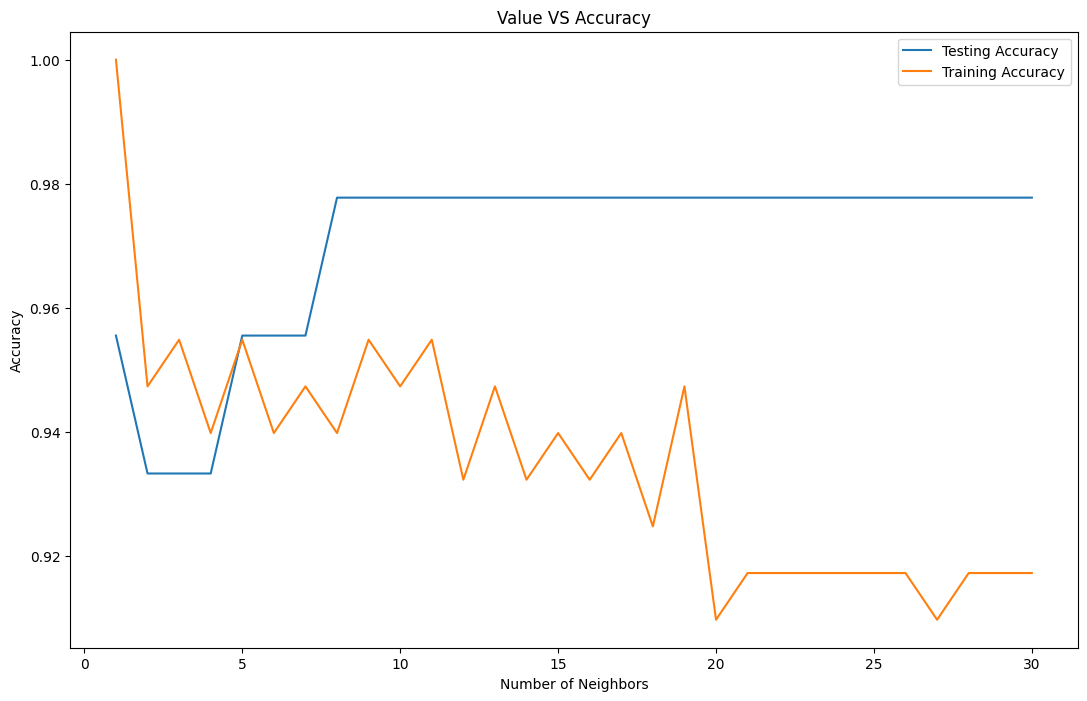

Best Accuracy is 0.9777777777777777 with K=8


In [ ]:
k_values = np.arange(1, 31)
train_accuracy, test_accuracy = [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[13, 8])
plt.plot(k_values, test_accuracy, label = "Testing Accuracy")
plt.plot(k_values, train_accuracy, label ="Training Accuracy")
plt.legend()
plt.title("Value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

print("Best Accuracy is {} with K={}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

## Using Cross Validation to Get the Best Value of k

Text(0, 0.5, 'Accuracy Score')

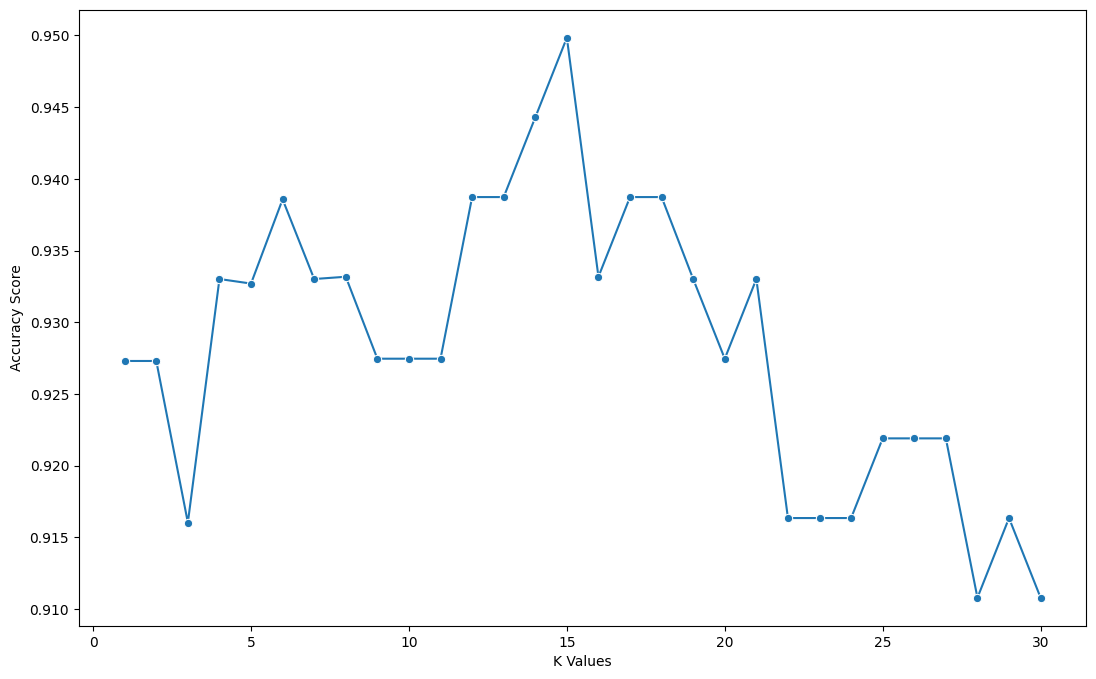

In [ ]:
from sklearn.model_selection import cross_val_score

scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

plt.figure(figsize=[13, 8])
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")